In [1]:
import os, glob
import xarray
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from IPython.display import Image

In [3]:
import matplotlib.dates as mdates

In [4]:
fs=16
plt.rc("font",size=fs)

In [5]:
figPath = "/glade/u/home/doubrawa/figs/"

In [6]:
inPath = "/glade/scratch/doubrawa/post_processing/"

In [7]:
fnames = sorted(glob.glob(os.path.join(inPath,"*SFC*.nc")))

In [8]:
fnames

['/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:00.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:10.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:20.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:30.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:40.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:50.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:00.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:10.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:20.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:30.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:40.nc',
 '/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:50.nc',
 '/glade/scratch/doubrawa/post_processin

In [9]:
varnames = ["HFX","QFX","LH","RMOL","UST","QVAPOR","theta","ALT"]

## some params

In [10]:
# how wide of a square box should we consider when averaging zi in space? [km]
extent_of_interest_km = 15
# spatial resolution of domain output in x/y [km]
dx_km = 0.025
# which grid points does that correspond to?
extent_of_interest_npts = int(np.round(extent_of_interest_km/dx_km))

In [11]:
extent_of_interest_npts

600

In [12]:
n_sn = 1200
n_we = 1200

In [13]:
sn_start = int((n_sn-extent_of_interest_npts)/2)
sn_end = int(sn_start+extent_of_interest_npts)

we_start = int((n_we-extent_of_interest_npts)/2)
we_end = int(we_start+extent_of_interest_npts)

# i/o

In [18]:
ust_ts   = {}
hfx_ts   = {}
lh_ts    = {}
heat_ts  = {}

ust_std  = {}
hfx_std  = {}
lh_std   = {}
heat_std = {}

In [19]:
i = 0

for fname in fnames:
    
    print(fname)
    
    #io    
    xr       = xarray.open_dataset(fname)
    time_str = fname.split('_SFC_')[-1][0:-3]
    pd_time  = pd.to_datetime(time_str,format="%Y-%m-%d_%H:%M")    

    # over the entire domain
    hfx  = xr.HFX
    lh   = xr.LH
    ust  = xr.UST
    
    # subset
    hfx_subset   = hfx.isel(south_north=np.arange(sn_start,sn_end,1)).isel(west_east=np.arange(we_start,we_end,1))
    lh_subset    = lh.isel(south_north=np.arange(sn_start,sn_end,1)).isel(west_east=np.arange(we_start,we_end,1))
    ust_subset   = ust.isel(south_north=np.arange(sn_start,sn_end,1)).isel(west_east=np.arange(we_start,we_end,1))    
    all_heat     = (hfx_subset + lh_subset)
    
    # save
    ust_ts[pd_time]  = float(ust_subset.median().values)
    hfx_ts[pd_time]  = float(hfx_subset.median().values)
    lh_ts[pd_time]   = float(lh_subset.median().values)
    heat_ts[pd_time] = float(all_heat.median().values)
    
    ust_std[pd_time]  = float(ust_subset.std().values)
    hfx_std[pd_time]  = float(hfx_subset.std().values)
    lh_std[pd_time]   = float(lh_subset.std().values)    
    heat_std[pd_time] = float(all_heat.std().values)    

/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:00.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:10.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:20.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:30.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:40.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_14:50.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:00.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:10.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:20.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:30.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:40.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_15:50.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-20_16:00.nc
/glade/scrat

/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_22:00.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_22:10.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_22:20.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_22:30.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_22:40.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_22:50.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_23:00.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_23:10.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_23:20.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_23:30.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_23:40.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-21_23:50.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-28_14:00.nc
/glade/scrat

/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_20:00.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_20:10.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_20:20.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_20:30.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_20:40.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_20:50.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_21:00.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_21:10.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_21:20.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_21:30.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_21:40.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_21:50.nc
/glade/scratch/doubrawa/post_processing/WRF_LES_25m_SFC_2015-03-29_22:00.nc
/glade/scrat

# df

In [40]:
df_ust = pd.Series(ust_ts)
df_hfx = pd.Series(hfx_ts)
df_lh  = pd.Series(lh_ts)
df_heat = pd.Series(heat_ts)

In [41]:
std_ust = pd.Series(ust_std)
std_hfx = pd.Series(hfx_std)
std_lh  = pd.Series(lh_std)
std_heat = pd.Series(heat_std)

# plot

In [42]:
colors_days = {20:'#ABB2B9',
               21:'#5DADE2',
               28:'#16A085',
               29:'#D4AC0D',
               30:'#A569BD'}

In [43]:
start = pd.Timestamp('20180606')

In [44]:
days = [20,21,28,29,30]

In [45]:
val_median = df_ust
val_stddev = std_ust
ylab       = "Spatially Averaged\nFriction Velocity\n"+r"$\langle u_* \rangle$ [m/s]"

In [46]:
# fig = plt.figure(figsize=(6,5))
# ax  = fig.add_subplot(111)

# iday = 0
# for day in days:
        
#     series = link.loc["2015-03-{0}".format(day)]    
#     deltas = series.index-series.index[0]+pd.Timedelta('14h')
#     index  = start+deltas
    
#     ax.plot(index[1:],
#             series.values[1:],color=colors_days[day],linestyle='-',lw=2,
#             marker='None',label='March {0}'.format(day))

# xticks = index[0::6]
# xticks = xticks.append(pd.DatetimeIndex([start+pd.Timedelta('24h')]))
# ax.set_xticks(xticks)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.set_xticklabels(["14:00\n(08:00 LT)","","16:00","","18:00","","20:00","","22:00","","24:00\n(18:00 LT)"])
# ax.set_xlim([xticks[0],xticks[-1]])
# ax.set_xlabel("Time of day [UTC]")

# ax.grid(color='lightgray',linestyle=':')

# ax.set_ylabel(ylab)

# # lg = plt.legend(ncol=2,fontsize=12,framealpha=0.2)
# fig.subplots_adjust(left=0.22,bottom=0.2,right=0.88)

# # fig.savefig("/glade/u/home/doubrawa/figs/ust_diurnal_cycles.png",dpi=300)

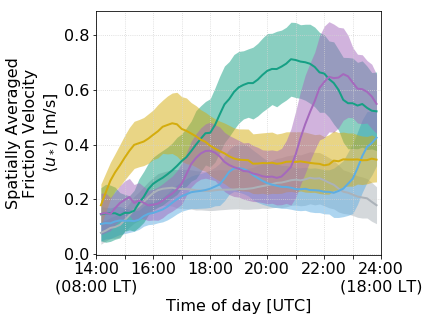

In [50]:
fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111)

iday = 0
for day in days:
        
    median_day = val_median.loc["2015-03-{0}".format(day)]    
    stddev_day = val_stddev.loc["2015-03-{0}".format(day)]        
    
    deltas = series.index-series.index[0]+pd.Timedelta('14h')
    index  = start+deltas
    
    ax.fill_between(index[1:],
                    (median_day-stddev_day).values[1:],
                    (median_day+stddev_day).values[1:],
                    color=colors_days[day],linestyle='-',lw=0,alpha=0.5,
                    label='March {0}'.format(day))    
    
    ax.plot(index[1:],
            median_day.values[1:],color=colors_days[day],linestyle='-',lw=2,
            marker='None',label='March {0}'.format(day))

xticks = index[0::6]
xticks = xticks.append(pd.DatetimeIndex([start+pd.Timedelta('24h')]))
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(["14:00\n(08:00 LT)","","16:00","","18:00","","20:00","","22:00","","24:00\n(18:00 LT)"])
ax.set_xlim([xticks[0],xticks[-1]])
ax.set_xlabel("Time of day [UTC]")

ax.grid(color='lightgray',linestyle=':')

ax.set_ylabel(ylab)

# lg = plt.legend(ncol=2,fontsize=12,framealpha=0.2)
fig.subplots_adjust(left=0.22,bottom=0.2,right=0.88)

fig.savefig("/glade/u/home/doubrawa/figs/ust_diurnal_cycles_with_shading.png",dpi=300)

In [51]:
val_median = df_heat
val_stddev = std_heat
ylab       = "Spatially Averaged\nSurface Heat Flux\n"+r"$\langle HFX + LH \rangle$ [W/m$^2$]"

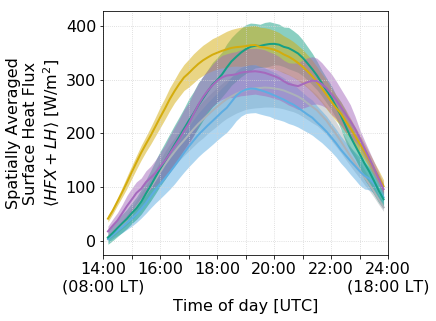

In [52]:
fig = plt.figure(figsize=(6,5))
ax  = fig.add_subplot(111)

iday = 0
for day in days:
        
    median_day = val_median.loc["2015-03-{0}".format(day)]    
    stddev_day = val_stddev.loc["2015-03-{0}".format(day)]        
    
    deltas = series.index-series.index[0]+pd.Timedelta('14h')
    index  = start+deltas
    
    ax.fill_between(index[1:],
                    (median_day-stddev_day).values[1:],
                    (median_day+stddev_day).values[1:],
                    color=colors_days[day],linestyle='-',lw=0,alpha=0.5,
                    label='March {0}'.format(day))    
    
    ax.plot(index[1:],
            median_day.values[1:],color=colors_days[day],linestyle='-',lw=2,
            marker='None',label='March {0}'.format(day))

xticks = index[0::6]
xticks = xticks.append(pd.DatetimeIndex([start+pd.Timedelta('24h')]))
ax.set_xticks(xticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xticklabels(["14:00\n(08:00 LT)","","16:00","","18:00","","20:00","","22:00","","24:00\n(18:00 LT)"])
ax.set_xlim([xticks[0],xticks[-1]])
ax.set_xlabel("Time of day [UTC]")

ax.grid(color='lightgray',linestyle=':')

ax.set_ylabel(ylab)

# lg = plt.legend(ncol=2,fontsize=12,framealpha=0.2)
fig.subplots_adjust(left=0.22,bottom=0.2,right=0.88)

fig.savefig("/glade/u/home/doubrawa/figs/hfx_diurnal_cycles_with_shading.png",dpi=300)

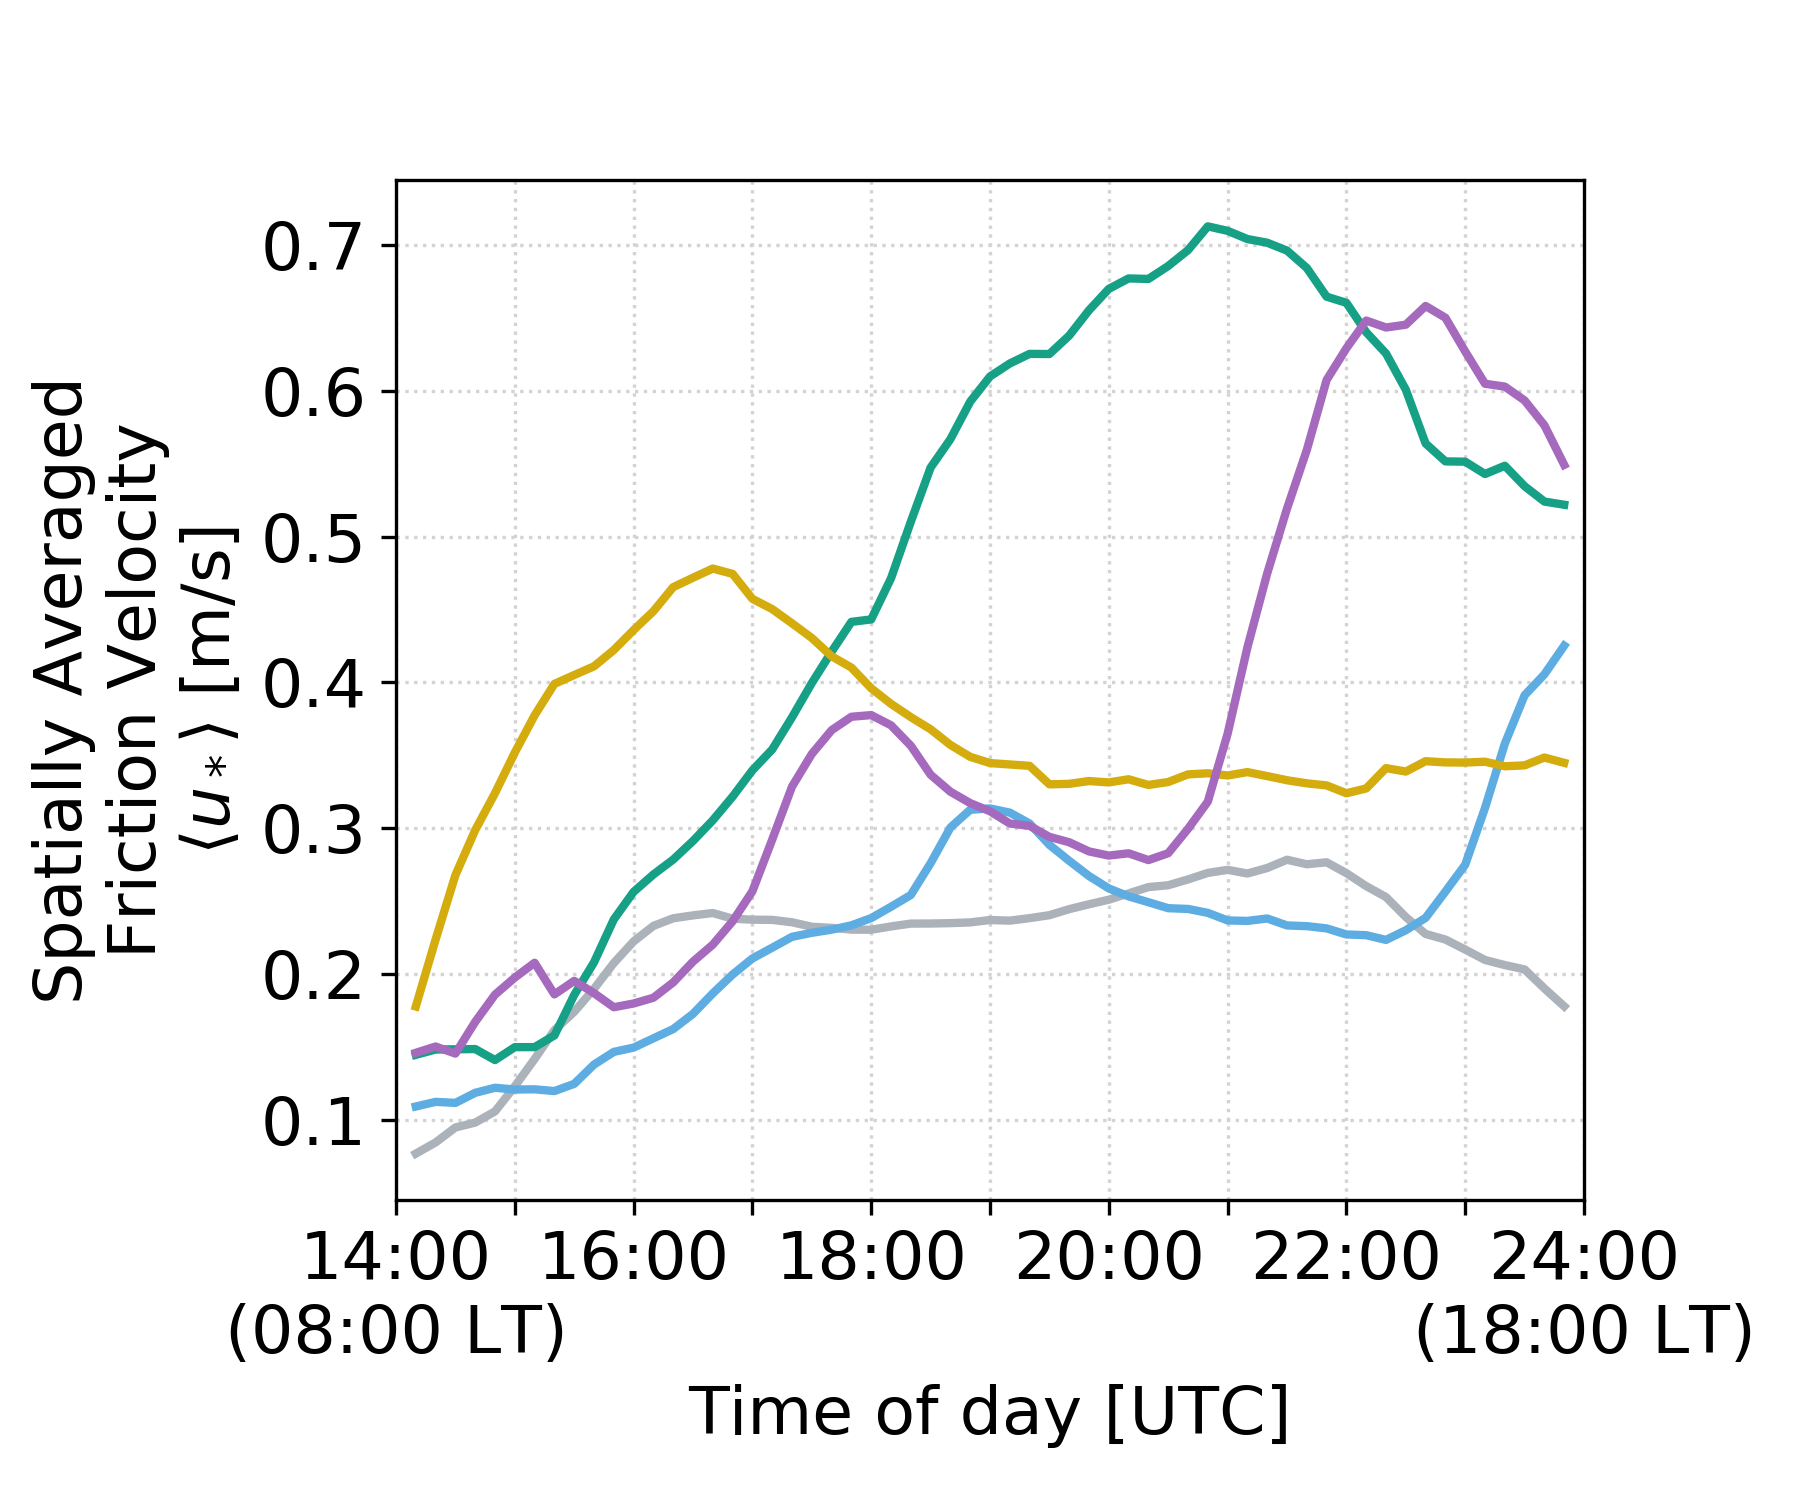

In [66]:
Image("/glade/u/home/doubrawa/figs/ust_diurnal_cycles.png")